# Function ramp

## Description

Create an 1, 2 or 3-dimensional image with increasing gray value bands. The function receives the output dimension, the number of increasing bands, and the range of values variation in each direction.

## Equation

$$ g(z,y,x) =  \lfloor \lfloor \frac{n_z}{S} z \rfloor \frac{kz_{max}-kz_{min}}{n_z-1} \rfloor + kz_{min} +\lfloor \lfloor \frac{n_y}{H} y \rfloor \frac{ky_{max}-ky_{min}}{n_y-1} \rfloor + ky_{min} + \lfloor \lfloor \frac{n_x}{W} x \rfloor \frac{kx_{max}-kx_{min}}{n_x-1} \rfloor + kx_{min} $$

## Synopse

Creates a 1D/2D/3D gray scale image with dimensions given by s, with n increasing gray scale bands with values varying from the specified range


- **g = ramp(s, n, range)**

    - **g**:output: ramp image.
    - **s**:input: [S H W]: slices, height and width output image dimensions.
    - **n**:input: [nz ny nx]: number of bands.
    - **range**:input: [kz_min, kz_max,ky_min,ky_max,kx_min,kx_max], minimum and maximum gray scale values on z,y and x dimension.

In [97]:
import numpy as np
def ramp(s, n, range=[0,255]):
    aux = np.array(n)
    s_orig = s
    
    if len(aux.shape) == 0:
        s = [1,s[0],s[1]]
        n = [0,0,n]
        range = [0,0,0,0,range[0],range[1]]

    slices,rows, cols = s[0], s[1], s[2]
    z,y,x = np.indices((slices,rows,cols))
    gz = z*n[0]//slices * (range[1]-range[0]) // (n[0]-1) + range[0]
    gy = y*n[1]//rows * (range[3]-range[2]) // (n[1]-1) + range[2]
    gx = x*n[2]//cols * (range[5]-range[4]) // (n[2]-1) + range[4]
    return (gz+gy+gx).reshape(s_orig)

## Function mosaic

This function puts the slices of a 3D image side-by-side on a mosaic (2D image). The objective is to provide basic 3D visualization.

### Synopse

Create a 2D visualization of a 3D image.

- **g = mosaic(f,N,s)**

    - **g**:output: Image. Mosaic of 2D images.
    - **f**:input: Image. 3D image.
    - **N**:input: Integer. Number of image columns in mosaic.
    - **s**:input: Float. Default: 1.0. Scale factor.
    


In [98]:
import numpy as np
import scipy
import scipy.ndimage
 
def mosaic(f,N,s=1.0):
    f = np.asarray(f)
    d,h,w = f.shape

    nLines = (np.ceil(float(d)/N)).astype(np.uint8)
    nCells = (nLines*N).astype(np.uint8)

    # Add black slices to match the exact number of mosaic cells
    fullf = np.resize(f, (nCells,h,w))
    fullf[d:nCells,:,:] = 0

    Y,X = np.indices((nLines*h,N*w))

    Pts = np.array([
        (np.floor(Y/h)*N + np.floor(X/w)).ravel(),
        np.mod(Y,h).ravel(),
        np.mod(X,w).ravel() ]).astype(int).reshape((3,nLines*h,N*w))
    g = fullf[Pts[0],Pts[1],Pts[2]]
    if (s != 1.0):
        g = scipy.ndimage.interpolation.zoom(g,s,order=5)
        #g = scipy.misc.imresize(g,s,interp='bilinear')
    return g

## Numeric example

In [99]:
testing = (__name__ == "__main__")

In [100]:
if testing:
    f = ramp([5,7], 3, [4,10])
    print(f,'\n')
    f = ramp((1,5,7),(0,3,0), [0,0,4,10,0,0])
    print(f,'\n')
    f = ramp([1,5,7],[3,0,0], [4,10,0,0,0,0])
    print(f,'\n')

[[ 4  4  4  7  7 10 10]
 [ 4  4  4  7  7 10 10]
 [ 4  4  4  7  7 10 10]
 [ 4  4  4  7  7 10 10]
 [ 4  4  4  7  7 10 10]] 

[[[ 4  4  4  4  4  4  4]
  [ 4  4  4  4  4  4  4]
  [ 7  7  7  7  7  7  7]
  [ 7  7  7  7  7  7  7]
  [10 10 10 10 10 10 10]]] 

[[[4 4 4 4 4 4 4]
  [4 4 4 4 4 4 4]
  [4 4 4 4 4 4 4]
  [4 4 4 4 4 4 4]
  [4 4 4 4 4 4 4]]] 



## Image example

In [101]:
if testing:
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline
    import sys,os
    ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

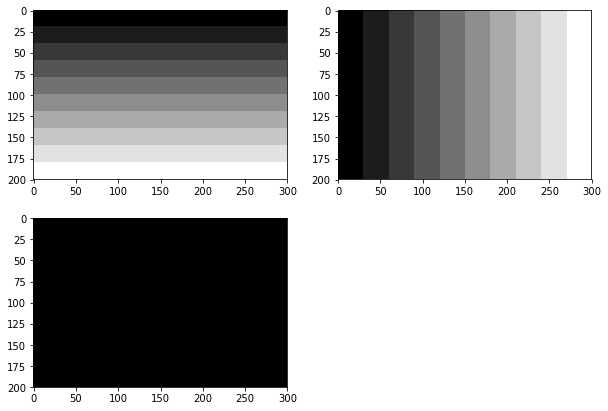

In [107]:
if testing:
    plt.figure(1, figsize=(10,7))
    
    F = ramp([1,200,300], [0,10,0], [0,0,0,255,0,0])
    Fv = ia.normalize(mosaic(F,1))
    
    plt.subplot(2,2,1)
    plt.imshow(Fv, cmap="gray")
    
    F = ramp([200,300], 10, [0,255])

    plt.subplot(2,2,2)
    plt.imshow(F, cmap="gray")

    F = ramp([1,200,300], [10,0,0], [0,255,0,0,0,0])
    Fv = ia.normalize(mosaic(F,1))
    plt.subplot(2,2,3)
    plt.imshow(Fv, cmap="gray")

## Image example - 3D

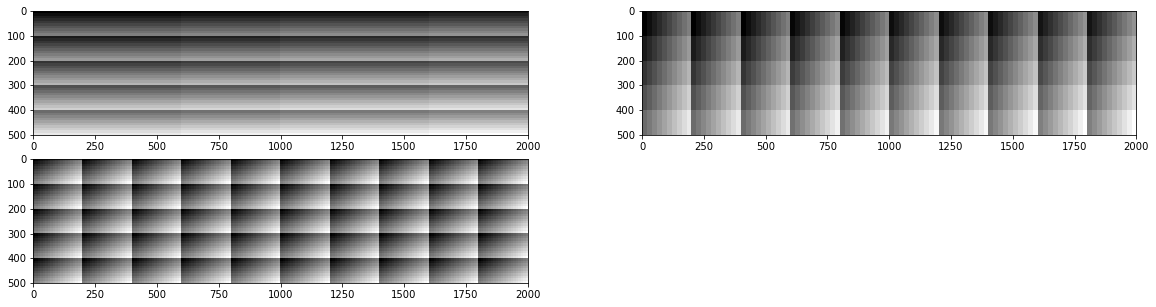

In [103]:
if testing:
    plt.figure(1, figsize=(20,5))
    F = ramp([50,100,200], [20,10,0], [0,255,0,255,0,0])
    Fv = ia.normalize(mosaic(F,10))
    
    plt.subplot(2,2,1)
    plt.imshow(Fv, cmap="gray")

    F = ramp([50,100,200], [20,0,10], [0,255,0,0,0,255])
    Fv = ia.normalize(mosaic(F,10))
    
    plt.subplot(2,2,2)
    plt.imshow(Fv, cmap="gray")
    
    F = ramp([50,100,200], [0,10,20], [0,0,0,255,0,255])
    Fv = ia.normalize(mosaic(F,10))
    
    plt.subplot(2,2,3)
    plt.imshow(Fv, cmap="gray")


## Image example 2 - 3D

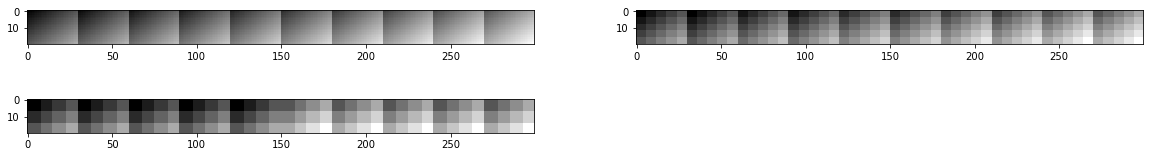

In [105]:
if testing:
    plt.figure(1, figsize=(20,3))
    
    F = ramp([10,20,30], [10,20,30], [0,255,0,255,0,255])
    Fv = ia.normalize(mosaic(F,10))
    
    plt.subplot(2,2,1)
    plt.imshow(Fv, cmap="gray")
    
    F = ramp([10,20,30], [5,5,5], [0,255,0,255,0,255])
    Fv = ia.normalize(mosaic(F,10))
    
    plt.subplot(2,2,2)
    plt.imshow(Fv, cmap="gray")
    
    F = ramp([10,20,30], [2,3,4], [0,255,0,255,0,255])
    Fv = ia.normalize(mosaic(F,10))
    
    plt.subplot(2,2,3)
    plt.imshow(Fv, cmap="gray")

## Contributions

Luis Antonio Prado, 1st semester 2017